In [5]:
import re
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf

In [8]:

# Specify relative path to the file
file_path = "../IAPS/banco_completo_modificado.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')


In [10]:

df['cir_proc_tto_min_rec'] = df['cir_proc_tto_min_rec'].replace('CIRURGIAS MULTIPLAS E SEQUENCIAIS', 'multiplas_cir_seq')

# Convert categorical variables to one-hot encoded columns
categorical_cols =['sexo', 'racacor', 'estadio', 'tipo_proc_min', 'proc_max', 
    'desc_f_org_tto_min', 'tipo_tto_min', 'perfil', 'estadio_rec','cidpri_min', 'cid_tto_min',
    'f_org_tto_min_rec', 'perfil_rec','cir_proc_tto_min_rec', 'cir_proc_tto_min_rec2',
    'cump_lei60dias', 'macro_tto', 'mun_pcn', 'regiao_pcn', 'macro_pcn', 'estabel_saude', 'cidade_estabel',
    'estado_estabel', 'regiao_estabel', 'macro_estabel', 'regiao_bras_estabel', 'finaliquimio',
    'finaliradio', 'time_diag']  
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Convert numeric variables to the correct data type
numeric_cols = ['qt_apac', 'qt_aih', 'idade', 'n_comorb', 'tempo_diag_tto_min', 'tempo_internacao', 'tempo_coorte']  
df_encoded[numeric_cols] = df_encoded[numeric_cols].astype(float)

# Apply Z-score normalization to numeric columns
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Prepare the data
X = df_encoded.drop('obito', axis=1)  # Features
y = df_encoded['obito']  # Target variable


In [23]:
df_encoded

0       1
1       1
2       1
3       1
4       1
       ..
4784    0
4785    1
4786    1
4787    1
4788    1
Name: obito, Length: 4789, dtype: int64


In [19]:
LISTA=[[0 for i in range(3)] for i in range(100)]

In [20]:
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Create XGBoost classifier
    model = xgb.XGBClassifier(use_label_encoder=False, objective='binary:logistic', eval_metric='logloss')

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    LISTA[i][0] = accuracy_score(y_test, y_pred)


    
    # Train the logistic regression model
    model = LogisticRegression(max_iter=500)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    LISTA[i][1] = accuracy_score(y_test, y_pred)


    
    
    
    # New Neural Network Model using Keras
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile with an optimizer that has a learning rate schedule
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Early Stopping to monitor the validation loss and stop when it starts increasing
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model with validation data and early stopping
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Make predictions on the test set
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    # Evaluate the model
    LISTA[i][2] = accuracy_score(y_test, y_pred)




2023-08-13 00:50:30.404195: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
120/120 [==============================] - 1s 3ms/step - loss: 1.1569 - accuracy: 0.6834 - val_loss: 0.7836 - val_accuracy: 0.6764
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 0.7039 - accuracy: 0.7137 - val_loss: 0.6527 - val_accuracy: 0.7328
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.7413 - val_loss: 0.6141 - val_accuracy: 0.7432
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5897 - accuracy: 0.7465 - val_loss: 0.5991 - val_accuracy: 0.7463
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5783 - accuracy: 0.7515 - val_loss: 0.5952 - val_accuracy: 0.7328
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.7510 - val_loss: 0.5824 - val_accuracy: 0.7505
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5591 - accuracy: 0.7578 - val_loss: 0.5752 - val_accuracy: 0.7557
Epoch 

120/120 [==============================] - 0s 2ms/step - loss: 0.5673 - accuracy: 0.7518 - val_loss: 0.5338 - val_accuracy: 0.7829
Epoch 9/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5728 - accuracy: 0.7552 - val_loss: 0.5393 - val_accuracy: 0.7714
Epoch 10/50
30/30 [==============================] - 0s 785us/step
Epoch 1/50
120/120 [==============================] - 1s 3ms/step - loss: 1.1740 - accuracy: 0.6719 - val_loss: 0.7704 - val_accuracy: 0.7015
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 0.7120 - accuracy: 0.7285 - val_loss: 0.6250 - val_accuracy: 0.7516
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.7418 - val_loss: 0.5865 - val_accuracy: 0.7610
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.7437 - val_loss: 0.5660 - val_accuracy: 0.7610
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5782 - accuracy:

120/120 [==============================] - 0s 2ms/step - loss: 0.5550 - accuracy: 0.7578 - val_loss: 0.5537 - val_accuracy: 0.7630
Epoch 15/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5488 - accuracy: 0.7604 - val_loss: 0.5532 - val_accuracy: 0.7610
Epoch 16/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5472 - accuracy: 0.7648 - val_loss: 0.5539 - val_accuracy: 0.7599
Epoch 17/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 0.7674 - val_loss: 0.5527 - val_accuracy: 0.7589
Epoch 18/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5474 - accuracy: 0.7693 - val_loss: 0.5496 - val_accuracy: 0.7620
Epoch 19/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5513 - accuracy: 0.7669 - val_loss: 0.5520 - val_accuracy: 0.7672
Epoch 20/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5520 - accuracy: 0.7651 - val_loss: 0.5512 - val_accuracy: 0.7850
Epoch 21/50

120/120 [==============================] - 0s 2ms/step - loss: 0.5544 - accuracy: 0.7646 - val_loss: 0.5664 - val_accuracy: 0.7547
Epoch 14/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5496 - accuracy: 0.7638 - val_loss: 0.5623 - val_accuracy: 0.7557
Epoch 15/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5436 - accuracy: 0.7729 - val_loss: 0.5644 - val_accuracy: 0.7453
Epoch 16/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5525 - accuracy: 0.7677 - val_loss: 0.5672 - val_accuracy: 0.7505
Epoch 17/50
30/30 [==============================] - 0s 757us/step
Epoch 1/50
120/120 [==============================] - 1s 3ms/step - loss: 1.1740 - accuracy: 0.6682 - val_loss: 0.7557 - val_accuracy: 0.7244
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.7270 - val_loss: 0.6198 - val_accuracy: 0.7610
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 0.6265 - accura

120/120 [==============================] - 0s 2ms/step - loss: 0.5840 - accuracy: 0.7510 - val_loss: 0.5443 - val_accuracy: 0.7672
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5746 - accuracy: 0.7460 - val_loss: 0.5456 - val_accuracy: 0.7735
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.7520 - val_loss: 0.5363 - val_accuracy: 0.7704
Epoch 8/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5704 - accuracy: 0.7499 - val_loss: 0.5374 - val_accuracy: 0.7704
Epoch 9/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5637 - accuracy: 0.7554 - val_loss: 0.5393 - val_accuracy: 0.7672
Epoch 10/50
30/30 [==============================] - 0s 749us/step
Epoch 1/50
120/120 [==============================] - 1s 3ms/step - loss: 1.1912 - accuracy: 0.6805 - val_loss: 0.7952 - val_accuracy: 0.6973
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 0.7228 - accuracy:

120/120 [==============================] - 0s 2ms/step - loss: 0.5614 - accuracy: 0.7591 - val_loss: 0.5676 - val_accuracy: 0.7495
Epoch 8/50
120/120 [==============================] - 0s 3ms/step - loss: 0.5609 - accuracy: 0.7583 - val_loss: 0.5560 - val_accuracy: 0.7463
Epoch 9/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.7575 - val_loss: 0.5584 - val_accuracy: 0.7516
Epoch 10/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5561 - accuracy: 0.7617 - val_loss: 0.5525 - val_accuracy: 0.7568
Epoch 11/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.7632 - val_loss: 0.5533 - val_accuracy: 0.7547
Epoch 12/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.7583 - val_loss: 0.5505 - val_accuracy: 0.7557
Epoch 13/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5552 - accuracy: 0.7674 - val_loss: 0.5504 - val_accuracy: 0.7630
Epoch 14/50
1

120/120 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.7502 - val_loss: 0.5899 - val_accuracy: 0.7537
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5761 - accuracy: 0.7507 - val_loss: 0.5882 - val_accuracy: 0.7443
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5644 - accuracy: 0.7533 - val_loss: 0.5770 - val_accuracy: 0.7557
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5627 - accuracy: 0.7510 - val_loss: 0.5766 - val_accuracy: 0.7463
Epoch 8/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5564 - accuracy: 0.7606 - val_loss: 0.5736 - val_accuracy: 0.7537
Epoch 9/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.7557 - val_loss: 0.5678 - val_accuracy: 0.7693
Epoch 10/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.7606 - val_loss: 0.5681 - val_accuracy: 0.7589
Epoch 11/50
120/

120/120 [==============================] - 0s 2ms/step - loss: 0.5545 - accuracy: 0.7567 - val_loss: 0.5626 - val_accuracy: 0.7370
Epoch 10/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5585 - accuracy: 0.7596 - val_loss: 0.5577 - val_accuracy: 0.7641
Epoch 11/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5550 - accuracy: 0.7578 - val_loss: 0.5567 - val_accuracy: 0.7370
Epoch 12/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.7614 - val_loss: 0.5616 - val_accuracy: 0.7557
Epoch 13/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.7591 - val_loss: 0.5533 - val_accuracy: 0.7547
Epoch 14/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.7606 - val_loss: 0.5549 - val_accuracy: 0.7578
Epoch 15/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.7572 - val_loss: 0.5536 - val_accuracy: 0.7380
Epoch 16/50

Epoch 16/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.7614 - val_loss: 0.5625 - val_accuracy: 0.7474
Epoch 17/50
30/30 [==============================] - 0s 751us/step
Epoch 1/50
120/120 [==============================] - 1s 6ms/step - loss: 1.1766 - accuracy: 0.6776 - val_loss: 0.7811 - val_accuracy: 0.7004
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 0.7063 - accuracy: 0.7277 - val_loss: 0.6311 - val_accuracy: 0.7411
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.7473 - val_loss: 0.5873 - val_accuracy: 0.7401
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.7518 - val_loss: 0.5734 - val_accuracy: 0.7453
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5785 - accuracy: 0.7557 - val_loss: 0.5669 - val_accuracy: 0.7411
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5740

120/120 [==============================] - 0s 2ms/step - loss: 0.5879 - accuracy: 0.7478 - val_loss: 0.5507 - val_accuracy: 0.7672
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5780 - accuracy: 0.7450 - val_loss: 0.5403 - val_accuracy: 0.7693
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5717 - accuracy: 0.7512 - val_loss: 0.5420 - val_accuracy: 0.7735
Epoch 8/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7541 - val_loss: 0.5382 - val_accuracy: 0.7735
Epoch 9/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7510 - val_loss: 0.5378 - val_accuracy: 0.7724
Epoch 10/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5647 - accuracy: 0.7536 - val_loss: 0.5432 - val_accuracy: 0.7704
Epoch 11/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5585 - accuracy: 0.7604 - val_loss: 0.5318 - val_accuracy: 0.7777
Epoch 12/50
120

120/120 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.7515 - val_loss: 0.5555 - val_accuracy: 0.7495
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5704 - accuracy: 0.7528 - val_loss: 0.5456 - val_accuracy: 0.7557
Epoch 8/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.7463 - val_loss: 0.5436 - val_accuracy: 0.7630
Epoch 9/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5597 - accuracy: 0.7585 - val_loss: 0.5430 - val_accuracy: 0.7620
Epoch 10/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5616 - accuracy: 0.7497 - val_loss: 0.5423 - val_accuracy: 0.7756
Epoch 11/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.7518 - val_loss: 0.5512 - val_accuracy: 0.7693
Epoch 12/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.7533 - val_loss: 0.5420 - val_accuracy: 0.7777
Epoch 13/50
12

120/120 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.7439 - val_loss: 0.5952 - val_accuracy: 0.7610
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 0.6009 - accuracy: 0.7505 - val_loss: 0.5728 - val_accuracy: 0.7589
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.7541 - val_loss: 0.5564 - val_accuracy: 0.7537
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5757 - accuracy: 0.7512 - val_loss: 0.5581 - val_accuracy: 0.7568
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.7567 - val_loss: 0.5511 - val_accuracy: 0.7599
Epoch 8/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5614 - accuracy: 0.7612 - val_loss: 0.5579 - val_accuracy: 0.7630
Epoch 9/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5626 - accuracy: 0.7609 - val_loss: 0.5521 - val_accuracy: 0.7537
Epoch 10/50
120/1

120/120 [==============================] - 0s 2ms/step - loss: 0.5552 - accuracy: 0.7572 - val_loss: 0.5473 - val_accuracy: 0.7537
Epoch 13/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5585 - accuracy: 0.7617 - val_loss: 0.5500 - val_accuracy: 0.7599
Epoch 14/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5552 - accuracy: 0.7606 - val_loss: 0.5510 - val_accuracy: 0.7589
Epoch 15/50
30/30 [==============================] - 0s 765us/step
Epoch 1/50
120/120 [==============================] - 1s 3ms/step - loss: 1.1885 - accuracy: 0.6896 - val_loss: 0.8345 - val_accuracy: 0.6775
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 0.7169 - accuracy: 0.7301 - val_loss: 0.6912 - val_accuracy: 0.7098
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 0.6207 - accuracy: 0.7460 - val_loss: 0.6291 - val_accuracy: 0.7317
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5883 - accurac

120/120 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.7512 - val_loss: 0.5337 - val_accuracy: 0.7683
Epoch 8/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.7531 - val_loss: 0.5314 - val_accuracy: 0.7610
Epoch 9/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5622 - accuracy: 0.7531 - val_loss: 0.5259 - val_accuracy: 0.7724
Epoch 10/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.7544 - val_loss: 0.5296 - val_accuracy: 0.7724
Epoch 11/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5597 - accuracy: 0.7567 - val_loss: 0.5218 - val_accuracy: 0.7787
Epoch 12/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5580 - accuracy: 0.7612 - val_loss: 0.5252 - val_accuracy: 0.7766
Epoch 13/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.7531 - val_loss: 0.5262 - val_accuracy: 0.7829
Epoch 14/50
3

120/120 [==============================] - 0s 2ms/step - loss: 0.5603 - accuracy: 0.7599 - val_loss: 0.5672 - val_accuracy: 0.7495
Epoch 9/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5572 - accuracy: 0.7609 - val_loss: 0.5698 - val_accuracy: 0.7516
Epoch 10/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5580 - accuracy: 0.7593 - val_loss: 0.5794 - val_accuracy: 0.7276
Epoch 11/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5570 - accuracy: 0.7666 - val_loss: 0.5617 - val_accuracy: 0.7484
Epoch 12/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.7580 - val_loss: 0.5604 - val_accuracy: 0.7474
Epoch 13/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5521 - accuracy: 0.7625 - val_loss: 0.5651 - val_accuracy: 0.7453
Epoch 14/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.7635 - val_loss: 0.5693 - val_accuracy: 0.7505
Epoch 15/50


120/120 [==============================] - 0s 2ms/step - loss: 0.5564 - accuracy: 0.7638 - val_loss: 0.5509 - val_accuracy: 0.7672
Epoch 12/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5584 - accuracy: 0.7593 - val_loss: 0.5531 - val_accuracy: 0.7662
Epoch 13/50
30/30 [==============================] - 0s 755us/step
Epoch 1/50
120/120 [==============================] - 1s 3ms/step - loss: 1.1727 - accuracy: 0.6831 - val_loss: 0.7792 - val_accuracy: 0.6973
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 0.7053 - accuracy: 0.7079 - val_loss: 0.6365 - val_accuracy: 0.7296
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 0.6195 - accuracy: 0.7356 - val_loss: 0.5939 - val_accuracy: 0.7516
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.7525 - val_loss: 0.5751 - val_accuracy: 0.7505
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5757 - accuracy

120/120 [==============================] - 0s 2ms/step - loss: 0.5591 - accuracy: 0.7588 - val_loss: 0.5456 - val_accuracy: 0.7724
Epoch 10/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5644 - accuracy: 0.7486 - val_loss: 0.5379 - val_accuracy: 0.7724
Epoch 11/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5568 - accuracy: 0.7578 - val_loss: 0.5351 - val_accuracy: 0.7881
Epoch 12/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.7544 - val_loss: 0.5332 - val_accuracy: 0.7777
Epoch 13/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5611 - accuracy: 0.7567 - val_loss: 0.5479 - val_accuracy: 0.7745
Epoch 14/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.7499 - val_loss: 0.5326 - val_accuracy: 0.7818
Epoch 15/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5585 - accuracy: 0.7625 - val_loss: 0.5357 - val_accuracy: 0.7850
Epoch 16/50

120/120 [==============================] - 0s 2ms/step - loss: 0.5539 - accuracy: 0.7588 - val_loss: 0.5574 - val_accuracy: 0.7683
Epoch 14/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.7593 - val_loss: 0.5536 - val_accuracy: 0.7693
Epoch 15/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.7588 - val_loss: 0.5587 - val_accuracy: 0.7610
Epoch 16/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5547 - accuracy: 0.7575 - val_loss: 0.5564 - val_accuracy: 0.7714
Epoch 17/50
30/30 [==============================] - 0s 784us/step
Epoch 1/50
120/120 [==============================] - 1s 3ms/step - loss: 1.1708 - accuracy: 0.6779 - val_loss: 0.7730 - val_accuracy: 0.7109
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 0.7116 - accuracy: 0.7264 - val_loss: 0.6395 - val_accuracy: 0.7380
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 0.6265 - accura

120/120 [==============================] - 0s 2ms/step - loss: 0.5680 - accuracy: 0.7492 - val_loss: 0.5700 - val_accuracy: 0.7484
Epoch 8/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.7536 - val_loss: 0.5537 - val_accuracy: 0.7568
Epoch 9/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.7536 - val_loss: 0.5505 - val_accuracy: 0.7620
Epoch 10/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5612 - accuracy: 0.7572 - val_loss: 0.5517 - val_accuracy: 0.7599
Epoch 11/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.7533 - val_loss: 0.5476 - val_accuracy: 0.7735
Epoch 12/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5615 - accuracy: 0.7572 - val_loss: 0.5492 - val_accuracy: 0.7568
Epoch 13/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5573 - accuracy: 0.7520 - val_loss: 0.5527 - val_accuracy: 0.7620
Epoch 14/50
1

120/120 [==============================] - 1s 3ms/step - loss: 1.1693 - accuracy: 0.6745 - val_loss: 0.7620 - val_accuracy: 0.7098
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 0.7125 - accuracy: 0.7189 - val_loss: 0.6247 - val_accuracy: 0.7453
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.7387 - val_loss: 0.5810 - val_accuracy: 0.7547
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5926 - accuracy: 0.7481 - val_loss: 0.5654 - val_accuracy: 0.7495
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5778 - accuracy: 0.7541 - val_loss: 0.5587 - val_accuracy: 0.7589
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7583 - val_loss: 0.5488 - val_accuracy: 0.7641
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.7533 - val_loss: 0.5466 - val_accuracy: 0.7526
Epoch 8/50
120/12

30/30 [==============================] - 0s 762us/step
Epoch 1/50
120/120 [==============================] - 1s 3ms/step - loss: 1.1870 - accuracy: 0.6617 - val_loss: 0.7779 - val_accuracy: 0.7035
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 0.7130 - accuracy: 0.7288 - val_loss: 0.6291 - val_accuracy: 0.7474
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.7424 - val_loss: 0.5882 - val_accuracy: 0.7495
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.7507 - val_loss: 0.5685 - val_accuracy: 0.7526
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7528 - val_loss: 0.5582 - val_accuracy: 0.7610
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.7572 - val_loss: 0.5544 - val_accuracy: 0.7578
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5699 - accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.7525 - val_loss: 0.5800 - val_accuracy: 0.7328
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5682 - accuracy: 0.7585 - val_loss: 0.5607 - val_accuracy: 0.7630
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5726 - accuracy: 0.7533 - val_loss: 0.5629 - val_accuracy: 0.7484
Epoch 8/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5628 - accuracy: 0.7601 - val_loss: 0.5642 - val_accuracy: 0.7526
Epoch 9/50
30/30 [==============================] - 0s 751us/step
Epoch 1/50
120/120 [==============================] - 1s 3ms/step - loss: 1.1589 - accuracy: 0.6685 - val_loss: 0.7572 - val_accuracy: 0.7046
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.7296 - val_loss: 0.6202 - val_accuracy: 0.7662
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 0.6225 - accuracy: 

30/30 [==============================] - 0s 752us/step
Epoch 1/50
120/120 [==============================] - 1s 3ms/step - loss: 1.1861 - accuracy: 0.6787 - val_loss: 0.7966 - val_accuracy: 0.6785
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 0.7039 - accuracy: 0.7296 - val_loss: 0.6501 - val_accuracy: 0.7422
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.7460 - val_loss: 0.6026 - val_accuracy: 0.7547
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5926 - accuracy: 0.7520 - val_loss: 0.5833 - val_accuracy: 0.7495
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.7499 - val_loss: 0.5712 - val_accuracy: 0.7589
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5671 - accuracy: 0.7580 - val_loss: 0.5709 - val_accuracy: 0.7547
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5597 - accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.5502 - accuracy: 0.7627 - val_loss: 0.5624 - val_accuracy: 0.7568
Epoch 16/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.7646 - val_loss: 0.5586 - val_accuracy: 0.7693
Epoch 17/50
30/30 [==============================] - 0s 754us/step
Epoch 1/50
120/120 [==============================] - 1s 3ms/step - loss: 1.1947 - accuracy: 0.6583 - val_loss: 0.7869 - val_accuracy: 0.7088
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 0.7230 - accuracy: 0.7197 - val_loss: 0.6345 - val_accuracy: 0.7474
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 0.6288 - accuracy: 0.7421 - val_loss: 0.5941 - val_accuracy: 0.7547
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.7478 - val_loss: 0.5703 - val_accuracy: 0.7557
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy

120/120 [==============================] - 0s 2ms/step - loss: 0.6242 - accuracy: 0.7465 - val_loss: 0.5940 - val_accuracy: 0.7359
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.7531 - val_loss: 0.5715 - val_accuracy: 0.7453
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.7507 - val_loss: 0.5598 - val_accuracy: 0.7505
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.7512 - val_loss: 0.5570 - val_accuracy: 0.7568
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.7567 - val_loss: 0.5518 - val_accuracy: 0.7568
Epoch 8/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5620 - accuracy: 0.7515 - val_loss: 0.5500 - val_accuracy: 0.7516
Epoch 9/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5599 - accuracy: 0.7588 - val_loss: 0.5508 - val_accuracy: 0.7578
Epoch 10/50
120/1

120/120 [==============================] - 0s 2ms/step - loss: 0.5611 - accuracy: 0.7554 - val_loss: 0.5441 - val_accuracy: 0.7630
Epoch 9/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5599 - accuracy: 0.7596 - val_loss: 0.5425 - val_accuracy: 0.7672
Epoch 10/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5607 - accuracy: 0.7585 - val_loss: 0.5399 - val_accuracy: 0.7505
Epoch 11/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5603 - accuracy: 0.7544 - val_loss: 0.5449 - val_accuracy: 0.7704
Epoch 12/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5527 - accuracy: 0.7562 - val_loss: 0.5403 - val_accuracy: 0.7745
Epoch 13/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5578 - accuracy: 0.7557 - val_loss: 0.5392 - val_accuracy: 0.7662
Epoch 14/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5603 - accuracy: 0.7622 - val_loss: 0.5373 - val_accuracy: 0.7766
Epoch 15/50


120/120 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.7345 - val_loss: 0.6528 - val_accuracy: 0.7349
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 0.6173 - accuracy: 0.7494 - val_loss: 0.6146 - val_accuracy: 0.7401
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5859 - accuracy: 0.7536 - val_loss: 0.6018 - val_accuracy: 0.7349
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.7604 - val_loss: 0.5987 - val_accuracy: 0.7401
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5682 - accuracy: 0.7557 - val_loss: 0.5926 - val_accuracy: 0.7359
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5583 - accuracy: 0.7643 - val_loss: 0.5886 - val_accuracy: 0.7296
Epoch 8/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5558 - accuracy: 0.7627 - val_loss: 0.5827 - val_accuracy: 0.7359
Epoch 9/50
120/12

120/120 [==============================] - 0s 4ms/step - loss: 0.5628 - accuracy: 0.7677 - val_loss: 0.5645 - val_accuracy: 0.7526
Epoch 12/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5570 - accuracy: 0.7622 - val_loss: 0.5570 - val_accuracy: 0.7526
Epoch 13/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5524 - accuracy: 0.7659 - val_loss: 0.5551 - val_accuracy: 0.7484
Epoch 14/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5515 - accuracy: 0.7622 - val_loss: 0.5585 - val_accuracy: 0.7495
Epoch 15/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.7640 - val_loss: 0.5636 - val_accuracy: 0.7526
Epoch 16/50
30/30 [==============================] - 0s 748us/step
Epoch 1/50
120/120 [==============================] - 1s 3ms/step - loss: 1.1883 - accuracy: 0.6826 - val_loss: 0.7976 - val_accuracy: 0.7244
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 0.7230 - accur

In [21]:
LIST = LISTA[0:100]

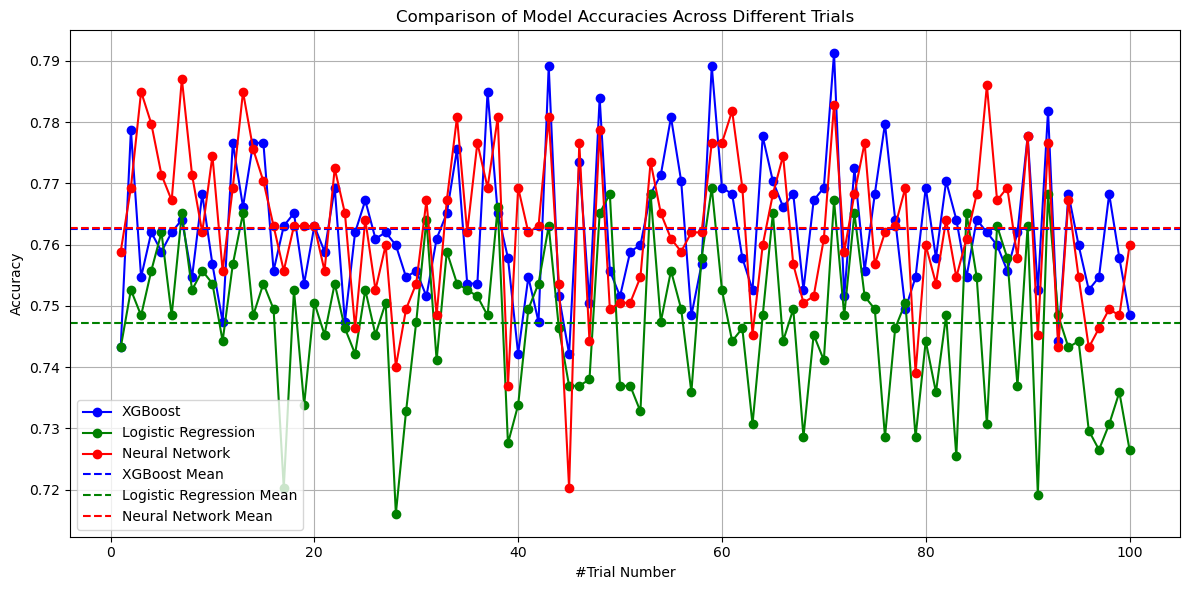

In [22]:
import matplotlib.pyplot as plt

# Assuming LIST is a list of lists, where each inner list has 3 accuracy values
# for XGBoost, Logistic Regression, and the Neural Network respectively.

# Convert LIST into a numpy array for easier indexing
import numpy as np
LIST = np.array(LIST)

# X values (trial numbers)
x_values = range(1, 101)  # Assuming you've done this for 30 trials

# Plotting
plt.figure(figsize=(12, 6))

# Plotting each model's results
plt.plot(x_values, LIST[:, 0], marker='o', label='XGBoost', color='blue')
plt.plot(x_values, LIST[:, 1], marker='o', label='Logistic Regression', color='green')
plt.plot(x_values, LIST[:, 2], marker='o', label='Neural Network', color='red')

# Drawing horizontal lines for means
plt.axhline(y=np.mean(LIST[:, 0]), color='blue', linestyle='--', label='XGBoost Mean')
plt.axhline(y=np.mean(LIST[:, 1]), color='green', linestyle='--', label='Logistic Regression Mean')
plt.axhline(y=np.mean(LIST[:, 2]), color='red', linestyle='--', label='Neural Network Mean')

# Setting labels, title, and legend
plt.xlabel('#Trial Number')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies Across Different Trials')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()
